In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score
import re
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("../imdb.csv", encoding="latin1")

In [3]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = re.sub("(.)\\1{2,}", "\\1", x)
    x = re.sub(r'[^\w\s]', '', x)
    return x

In [4]:
data = data[data["label"]!="unsup"]

In [6]:
train_set = data[data["type"] == "train"]
test_set = data[data["type"] == "test"]

In [7]:
x_train = train_set["review"]
y_train = train_set["label"]
x_test = test_set["review"]
y_test = test_set["label"]

In [8]:
tfidf = TfidfVectorizer()
lr = LogisticRegression()
model = make_pipeline(tfidf, lr)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.88      0.88      0.88     12500
         pos       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [10]:
precision_score(y_test, y_pred, average="macro")
accuracy_score(y_test, y_pred)

0.88284

In [11]:

# Specify the file path where you want to save the model
model_file_path = './pipe.pkl'

# Save the trained model using pickle
with open(model_file_path, 'wb') as file:
    pickle.dump(model, file)

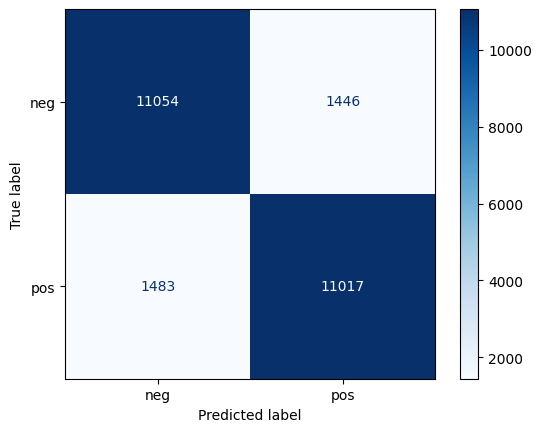

In [12]:
cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='.0f', xticks_rotation='horizontal')

In [14]:
# Create binary classifiers
tfidf = TfidfVectorizer()
lr = LogisticRegression(max_iter=5000)
model = make_pipeline(tfidf, lr)

# # Define the grid of C values to search
c_values = np.linspace(1, 10, 5)

# # Create a dictionary of parameter values to search
param_grid = {'logisticregression__C': c_values}

# # Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

# # Fit the grid search objects on the training set
grid_search.fit(x_train, y_train)

# # Display performance indicators for classifier with best C
print(grid_search.best_score_)
# # Display the best parameter value for each binary classifier
print('best C:', grid_search.best_params_['logisticregression__C'])

0.8625599999999999
best C: 1.0
